In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random



In [2]:
#importing the kaggle data
kaggle_spot_df = pd.read_csv("Resources/kaggle_spotify.csv")

print(f'The are {len(kaggle_spot_df)} songs in this this data set')
kaggle_spot_df.head()

The are 169909 songs in this this data set


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


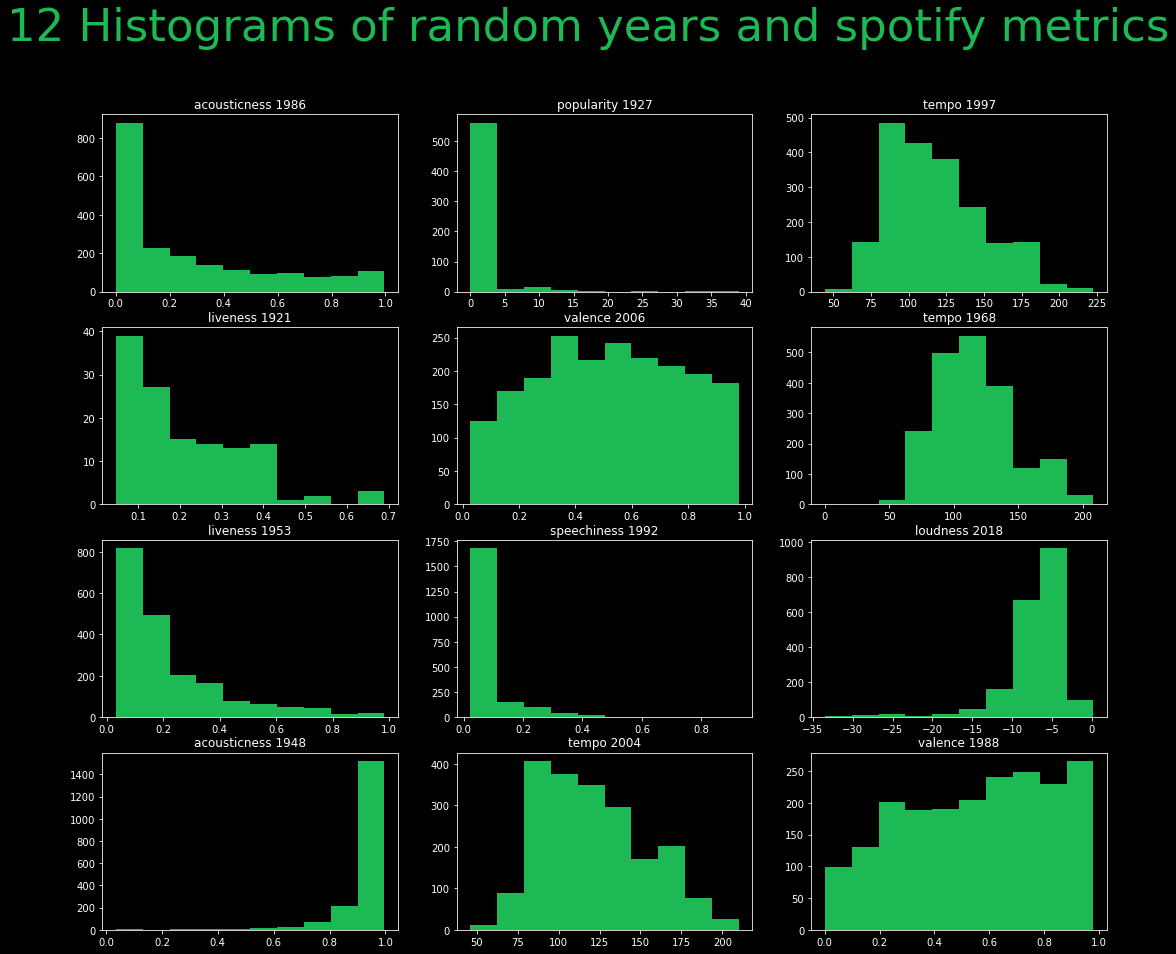

In [3]:
#review histograms of random year for 12 random spotify metrics. 
### I'm wondering if we could use scipy.stats.normaltest conditionally to select mean vs median when appropriate

#creates a list of each year
years_list=kaggle_spot_df['year'].unique().tolist()
# print(type(years_list))
years_list

#list of each metric
metric_list=['acousticness','danceability','energy','instrumentalness','liveness','loudness', 'popularity','speechiness','tempo','valence']

##### creates 10 histograms for 1980's accousticness, itterate this so it chooses a few different years and different metrics
fig_h=plt.figure(figsize=(18,15),facecolor='black')
fig_h.suptitle('12 Histograms of random years and spotify metrics',color='#1DB954',fontsize=45)

for t in range(1,13):

    rando_year=random.choice(years_list)
    rando_metric=random.choice(metric_list)

    ax_h=fig_h.add_subplot(4,3,t)
    ax_h.spines['bottom'].set_color('white')
    ax_h.spines['top'].set_color('white')
    ax_h.spines['right'].set_color('white')
    ax_h.spines['left'].set_color('white')
    ax_h.tick_params(axis='x', colors='white')
    ax_h.tick_params(axis='y', colors='white')
    ax_h.yaxis.label.set_color('white')
    ax_h.xaxis.label.set_color('white')
    ax_h.title.set_color('white')
    ax_h.patch.set_alpha(0)
    plt.title(str(rando_metric)+' '+str(rando_year))
    histy=kaggle_spot_df.loc[kaggle_spot_df['year']==rando_year,:][rando_metric]
    plt.hist(histy,color='#1DB954')
plt.show()
 


In [4]:
### i'm thining I could create line graphs for mean and median and compare them
# #agg mean of spotify metrics by year
annual_metrics_df=kaggle_spot_df[['year','acousticness','danceability','energy','instrumentalness','liveness','loudness', 'popularity','speechiness','tempo','valence']].groupby('year').median()

annual_metrics_df.head()



,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
year,,,,,,,,,,
1921,0.9885,0.3990,0.211,0.03785,0.1650,-16.2705,0.0,0.04540,90.5815,0.4315
1922,0.9940,0.4895,0.201,0.32450,0.1575,-18.6210,0.0,0.06665,89.6905,0.5490
1923,0.9920,0.5790,0.247,0.19900,0.1730,-13.9930,4.0,0.06790,108.4560,0.6140
1924,0.9940,0.5620,0.323,0.84500,0.1850,-13.8770,0.0,0.06530,118.2050,0.6930
1925,0.9890,0.5750,0.241,0.17400,0.1550,-13.5470,0.0,0.07590,114.0380,0.6570


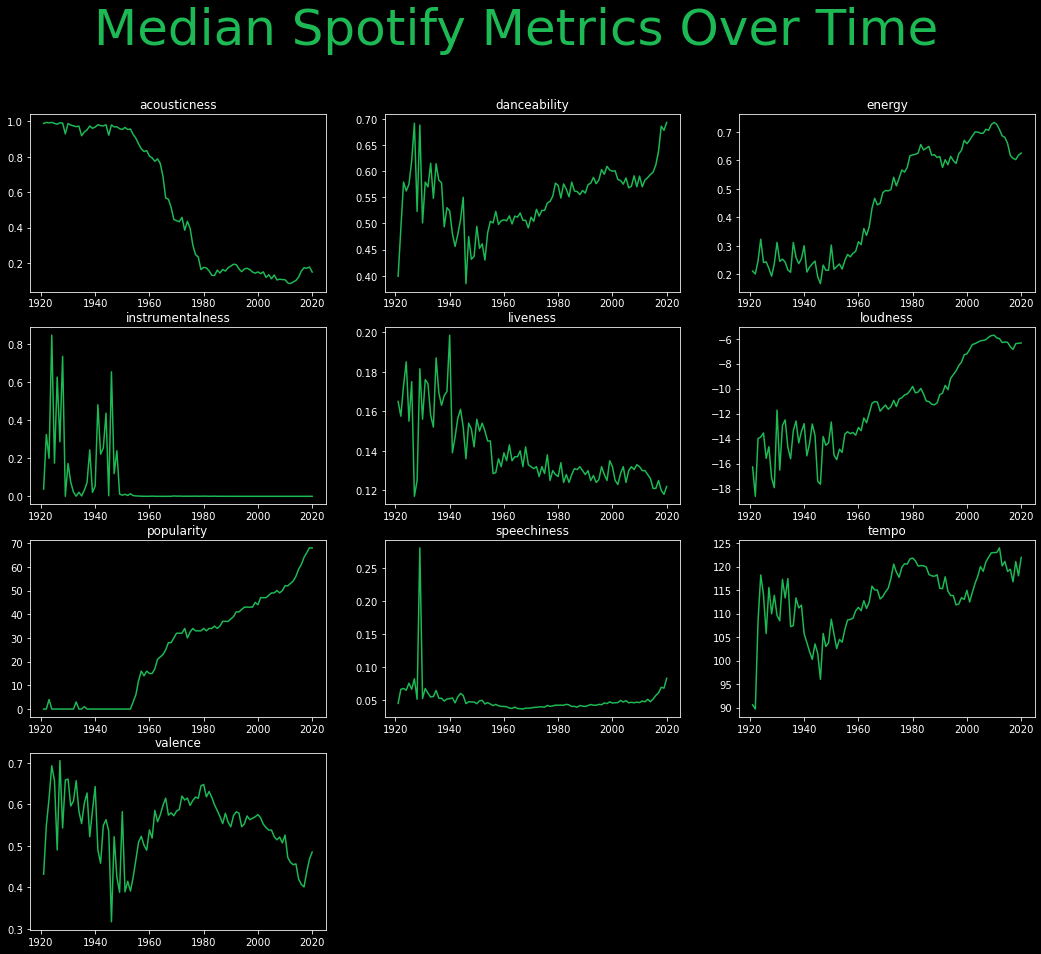

In [5]:
#turns the metric names into a list
spot_metric_names=annual_metrics_df.columns.to_list()


### plots graphs 4 by 3 with spotify colors
fig = plt.figure(figsize=(18,15),facecolor='black')
# fig.
fig.suptitle('Median Spotify Metrics Over Time',fontsize=50,color='#1DB954')
for i in range(1,11):
    ax=fig.add_subplot(4,3,i)
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')
    ax.title.set_color('white')
    ax.patch.set_alpha(0)
    plt.plot(annual_metrics_df.index,annual_metrics_df.iloc[:,i-1],c='#1DB954')
    plt.title(spot_metric_names[i-1])
plt.show()


